In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as sp

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/scet/crashtest.csv
/kaggle/input/scet/victim.csv
/kaggle/input/scet/party.csv
/kaggle/input/scet/crashtrain.csv


# Introductory Data Analysis and Data Cleaning

In [2]:
training = pd.read_csv('/kaggle/input/scet/crashtrain.csv')
testing = pd.read_csv('/kaggle/input/scet/crashtest.csv')
victim = pd.read_csv('/kaggle/input/scet/victim.csv')
party = pd.read_csv('/kaggle/input/scet/party.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
training.isna()

,case_id,jurisdiction,officer_id,reporting_district,chp_shift,population,county_city_location,special_condition,beat_type,chp_beat_type,...,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,primary_ramp,secondary_ramp,latitude,longitude,collision_date,collision_time,process_date
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,True,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216295,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,False,False
216296,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,False,False
216297,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,False,False
216298,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,False,False


In [4]:
training.isna().sum()

case_id                    0
jurisdiction             182
officer_id               448
reporting_district    140563
chp_shift                  0
                       ...  
latitude              139916
longitude             139916
collision_date             0
collision_time           598
process_date               0
Length: 74, dtype: int64

In [5]:
training

,case_id,jurisdiction,officer_id,reporting_district,chp_shift,population,county_city_location,special_condition,beat_type,chp_beat_type,...,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,primary_ramp,secondary_ramp,latitude,longitude,collision_date,collision_time,process_date
0,8.975622e+06,3003.0,1248,NaN,5,5.0,3003,0.0,0,not chp,...,0,0,1,NaN,NaN,NaN,NaN,2019-09-28,18:58:00,2019-11-22
1,2.413594e+06,3000.0,1978,NaN,5,4.0,3021,0.0,0,not chp,...,0,0,1,NaN,NaN,NaN,NaN,2005-12-10,15:00:00,2006-04-13
2,4.419931e+06,4307.0,S0542,LG206,5,4.0,4307,0.0,0,not chp,...,0,0,1,NaN,NaN,NaN,NaN,2009-09-11,14:57:00,2010-05-19
3,3.801010e+18,3801.0,2108,0,5,7.0,3801,NaN,0,not chp,...,0,0,1,NaN,NaN,NaN,NaN,2001-03-19,17:05:00,2001-07-27
4,8.142389e+06,2701.0,5543,CRML,5,2.0,2701,0.0,0,not chp,...,0,0,0,NaN,NaN,NaN,NaN,2016-09-17,17:32:00,2016-10-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216295,8.379958e+06,1901.0,275,17,5,5.0,1901,0.0,0,not chp,...,0,0,1,NaN,NaN,NaN,NaN,2017-04-20,11:52:00,2017-07-06
216296,3.388177e+06,9295.0,010846,NaN,1,9.0,300,0.0,1,state route,...,0,0,1,NaN,NaN,NaN,NaN,2007-09-20,12:15:00,2008-03-27
216297,8.749483e+06,3342.0,788,631,5,4.0,3342,0.0,0,not chp,...,0,0,1,NaN,NaN,NaN,NaN,2018-09-04,05:33:00,2019-01-08
216298,9.019111e+07,9135.0,014425,NaN,2,9.0,4500,0.0,2,safety services program,...,0,0,1,NaN,NaN,NaN,NaN,2016-05-24,15:30:00,2016-05-31


<AxesSubplot:xlabel='weather_1', ylabel='Count'>

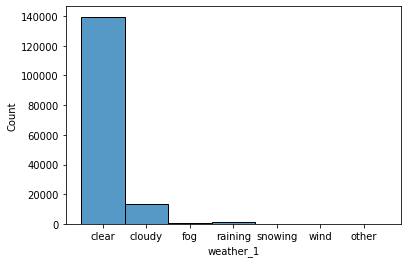

In [6]:
injured_only = training.where(training['injured_victims']==1).dropna(axis = 0, how = any, thresh = 1)[['weather_1', 'injured_victims']]
sns.histplot(x=injured_only['weather_1'])
#clear skies = most amount of injured --> weather does not have a significant effect on injury rate

<AxesSubplot:xlabel='road_condition_1', ylabel='Count'>

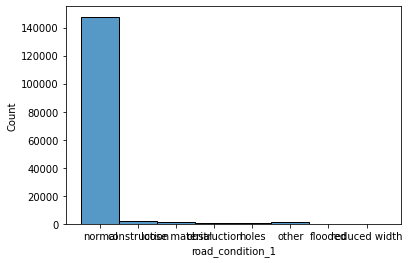

In [7]:
injured_only_r = training.where(training['injured_victims']==1).dropna(axis = 0, how = any, thresh = 1)[['road_condition_1', 'injured_victims']]
sns.histplot(x=injured_only_r['road_condition_1'])
#normal road = most amount of injured --> road conditions do not have a significant effect on injury rate

<AxesSubplot:xlabel='lighting', ylabel='Count'>

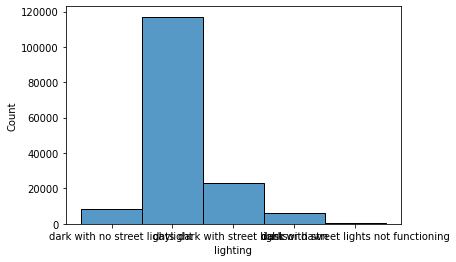

In [8]:
injured_only_l = training.where(training['injured_victims']==1).dropna(axis = 0, how = any, thresh = 1)[['lighting', 'injured_victims']]
sns.histplot(x=injured_only_l['lighting'])
#most injuries happen during daylight --> no significant effect

<AxesSubplot:xlabel='type_of_collision', ylabel='Count'>

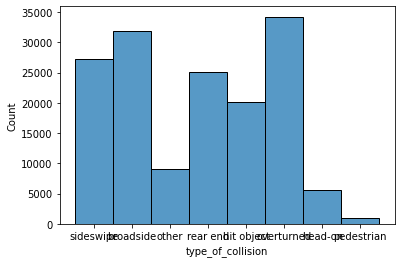

In [9]:
injured_only_type = training.where(training['injured_victims']==1).dropna(axis = 0, how = any, thresh = 1)[['type_of_collision', 'injured_victims']]
sns.histplot(x=injured_only_type['type_of_collision'])
#great diversity in data - need to analyze

<AxesSubplot:xlabel='road_surface', ylabel='Count'>

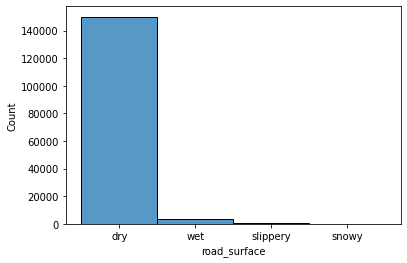

In [10]:
injured_only_ro = training.where(training['injured_victims']==1).dropna(axis = 0, how = any, thresh = 1)[['road_surface', 'injured_victims']]
sns.histplot(x=injured_only_ro['road_surface'])
#most injuries happen when the road surface is dry --> no significant effect

<AxesSubplot:xlabel='location_type', ylabel='Count'>

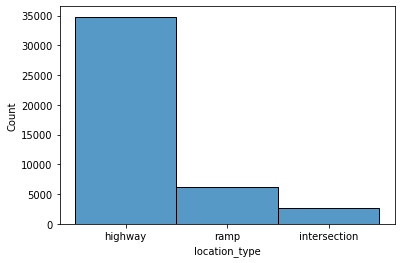

In [11]:
injured_only_lt = training.where(training['injured_victims']==1).dropna(axis = 0, how = any, thresh = 1)[['location_type', 'injured_victims']]
sns.histplot(x=injured_only_lt['location_type'])
#most happen in highways --> main cause is assumed to be speeding on highways --> location has a significant impact on injury rate

<AxesSubplot:xlabel='time_col', ylabel='Count'>

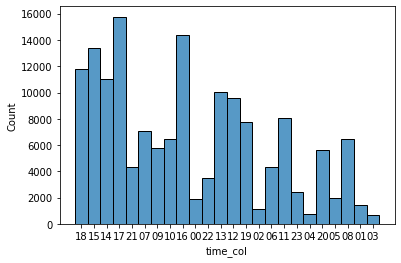

In [12]:
training_2 = training
training_2["time_col"] = training_2['collision_time'].fillna('00:').str.extract(r'([0-9]{2})')
training_2

injured_only_timestamp = training_2.where(training_2['injured_victims']==1).dropna(axis = 0, how = any, thresh = 1)[['time_col', 'injured_victims']]
sns.histplot(x=injured_only_timestamp['time_col'])
#most happen in the afternoon, from 3pm-6pm

<AxesSubplot:xlabel='control_device', ylabel='Count'>

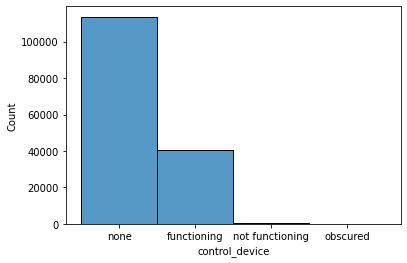

In [13]:
injured_only_cd = training.where(training['injured_victims']==1).dropna(axis = 0, how = any, thresh = 1)[['control_device', 'injured_victims']]
sns.histplot(x=injured_only_cd['control_device'])
#most happen when there is no control device equipped in the vehicle --> what does this mean?

<AxesSubplot:xlabel='primary_collision_factor', ylabel='Count'>

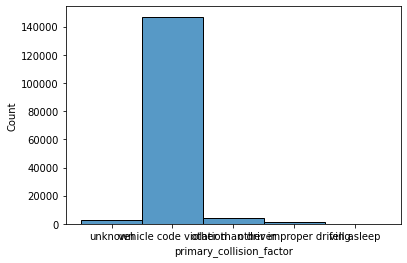

In [14]:
injured_only_pcf = training.where(training['injured_victims']==1).dropna(axis = 0, how = any, thresh = 1)[['primary_collision_factor', 'injured_victims']]
sns.histplot(x=injured_only_pcf['primary_collision_factor'])
#basically any vehicle code violation = leading factor

<AxesSubplot:xlabel='county_city_location', ylabel='Count'>

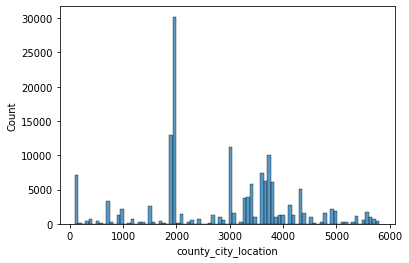

In [15]:
injured_only_ccl = training.where(training['injured_victims']==1).dropna(axis = 0, how = any, thresh = 1)[['county_city_location', 'injured_victims']]
sns.histplot(x=injured_only_ccl['county_city_location'])
#one county has a huge count of accidents --> county link to accident rate? --> analyze further

<AxesSubplot:xlabel='collision_severity', ylabel='Count'>

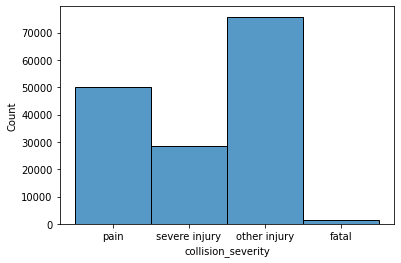

In [16]:
injured_only_sev = training.where(training['injured_victims']==1).dropna(axis = 0, how = any, thresh = 1)[['collision_severity','injured_victims']]
sns.histplot(x=injured_only_sev['collision_severity'])
#no particular link between the level of injury and "injured"

In [17]:
training_2[['case_id', 'injured_victims', 'weather_1', 'county_city_location', 'location_type', 'pcf_violation_category', 'collision_severity','lighting', 'time_col']].dropna(axis = 0, how = 'any')

,case_id,injured_victims,weather_1,county_city_location,location_type,pcf_violation_category,collision_severity,lighting,time_col
5,3.098229e+06,0.0,clear,1941,highway,other than driver (or pedestrian),property damage only,dark with no street lights,02
8,2.607120e+05,1.0,cloudy,3007,highway,unsafe lane change,other injury,daylight,09
9,9.335011e+18,0.0,clear,3801,highway,speeding,property damage only,daylight,17
11,8.612484e+06,1.0,clear,3015,ramp,improper turning,pain,daylight,09
13,4.283125e+06,0.0,clear,1942,highway,speeding,property damage only,daylight,16
...,...,...,...,...,...,...,...,...,...
216286,5.906362e+06,1.0,clear,3603,ramp,speeding,severe injury,dark with street lights,18
216292,5.565961e+06,0.0,clear,111,highway,speeding,property damage only,daylight,09
216294,8.001887e+06,1.0,clear,4316,highway,speeding,other injury,daylight,14
216296,3.388177e+06,1.0,cloudy,300,highway,wrong side of road,pain,daylight,12


In [18]:
cleaned_training = training_2[['case_id', 'injured_victims', 'weather_1', 'county_city_location', 'location_type', 'pcf_violation_category', 'collision_severity','lighting', 'time_col']].dropna(axis = 0, how = 'any')
cleaned_training

,case_id,injured_victims,weather_1,county_city_location,location_type,pcf_violation_category,collision_severity,lighting,time_col
5,3.098229e+06,0.0,clear,1941,highway,other than driver (or pedestrian),property damage only,dark with no street lights,02
8,2.607120e+05,1.0,cloudy,3007,highway,unsafe lane change,other injury,daylight,09
9,9.335011e+18,0.0,clear,3801,highway,speeding,property damage only,daylight,17
11,8.612484e+06,1.0,clear,3015,ramp,improper turning,pain,daylight,09
13,4.283125e+06,0.0,clear,1942,highway,speeding,property damage only,daylight,16
...,...,...,...,...,...,...,...,...,...
216286,5.906362e+06,1.0,clear,3603,ramp,speeding,severe injury,dark with street lights,18
216292,5.565961e+06,0.0,clear,111,highway,speeding,property damage only,daylight,09
216294,8.001887e+06,1.0,clear,4316,highway,speeding,other injury,daylight,14
216296,3.388177e+06,1.0,cloudy,300,highway,wrong side of road,pain,daylight,12


#### Now exploring the Party set

In [19]:
party

,id,case_id,party_number,party_type,at_fault,party_sex,party_age,party_sobriety,party_drug_physical,direction_of_travel,...,other_associate_factor_2,party_number_killed,party_number_injured,movement_preceding_collision,vehicle_year,vehicle_make,statewide_vehicle_type,chp_vehicle_type_towing,chp_vehicle_type_towed,party_race
0,16,3511283.0,1,driver,1,female,43.0,A,NaN,W,...,NaN,0,1,proceeding straight,1991.0,HYUNDAI,motorcycle or scooter,2.0,0.0,white
1,17,3511283.0,2,driver,0,male,28.0,A,NaN,S,...,NaN,0,0,proceeding straight,2002.0,INTERNATIONAL HARVESTER,truck or truck tractor with trailer,25.0,31.0,white
2,535,3515256.0,1,driver,1,male,25.0,A,NaN,S,...,NaN,0,0,making left turn,2004.0,FREIGHTLINER,truck or truck tractor with trailer,27.0,31.0,hispanic
3,536,3515256.0,2,driver,0,male,35.0,A,NaN,E,...,NaN,0,1,proceeding straight,2007.0,HARLEY-DAVIDSON,motorcycle or scooter,2.0,0.0,black
4,579,3515353.0,1,driver,1,male,59.0,A,NaN,E,...,NaN,0,0,backing,1998.0,HONDA,passenger car,1.0,0.0,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489857,13951689,90180387.0,1,driver,1,male,47.0,A,NaN,W,...,NaN,1,0,proceeding straight,2016.0,HUSQ,motorcycle or scooter,2.0,NaN,white
489858,14192890,90309377.0,1,driver,1,male,43.0,B,NaN,W,...,NaN,1,0,other unsafe turning,2005.0,SUZU,motorcycle or scooter,2.0,NaN,hispanic
489859,14192891,90309377.0,2,driver,0,female,33.0,A,NaN,E,...,NaN,0,0,proceeding straight,2013.0,DODG,passenger car,1.0,NaN,white
489860,13119226,7127717.0,1,driver,0,male,24.0,A,NaN,E,...,NaN,0,0,changing lanes,1998.0,BMW,passenger car,1.0,NaN,hispanic


In [20]:
party.isna().sum()

id                                   0
case_id                              0
party_number                         0
party_type                         596
at_fault                             0
party_sex                        38091
party_age                        45583
party_sobriety                    9192
party_drug_physical             435403
direction_of_travel               7628
party_safety_equipment_1         90703
party_safety_equipment_2        129433
financial_responsibility         42225
hazardous_materials             489430
cellphone_use                    80491
school_bus_related              489265
oaf_violation_code              488026
oaf_violation_category          451293
oaf_violation_section           435482
oaf_violation_suffix            477301
other_associate_factor_1         22911
other_associate_factor_2        479175
party_number_killed                  0
party_number_injured                 0
movement_preceding_collision      4931
vehicle_year             

In [21]:
cleaned_party = party[['case_id', 'at_fault', 'party_sex','party_age','party_sobriety','party_safety_equipment_1','cellphone_use','movement_preceding_collision','party_race']]
cleaned_party

,case_id,at_fault,party_sex,party_age,party_sobriety,party_safety_equipment_1,cellphone_use,movement_preceding_collision,party_race
0,3511283.0,1,female,43.0,A,M,3,proceeding straight,white
1,3511283.0,0,male,28.0,A,L,3,proceeding straight,white
2,3515256.0,1,male,25.0,A,P,3,making left turn,hispanic
3,3515256.0,0,male,35.0,A,P,3,proceeding straight,black
4,3515353.0,1,male,59.0,A,M,3,backing,white
...,...,...,...,...,...,...,...,...,...
489857,90180387.0,1,male,47.0,A,NaN,3,proceeding straight,white
489858,90309377.0,1,male,43.0,B,NaN,3,other unsafe turning,hispanic
489859,90309377.0,0,female,33.0,A,L,3,proceeding straight,white
489860,7127717.0,0,male,24.0,A,M,3,changing lanes,hispanic


##### Now exploring the victim set

In [22]:
victim

,id,case_id,party_number,victim_role,victim_sex,victim_age,victim_degree_of_injury,victim_seating_position,victim_safety_equipment_1,victim_safety_equipment_2,victim_ejected
0,4,3511283.0,1,1,female,43.0,other visible injury,1,M,G,0.0
1,247,3515256.0,2,1,male,35.0,complaint of pain,1,P,W,1.0
2,265,3515353.0,2,1,male,34.0,killed,1,W,NaN,1.0
3,699,3522552.0,1,1,male,47.0,other visible injury,1,M,G,0.0
4,700,3522552.0,2,1,male,43.0,killed,1,P,W,1.0
...,...,...,...,...,...,...,...,...,...,...,...
322689,7254152,7151871.0,2,2,male,NaN,no injury,3.0,M,G,0.0
322690,7358398,8055581.0,1,1,male,48.0,severe injury,1.0,P,W,1.0
322691,7685444,90180387.0,1,1,male,47.0,killed,1.0,P,W,1.0
322692,7828718,90309377.0,1,1,male,43.0,killed,1.0,P,W,1.0


In [23]:
victim.isna().sum()

id                               0
case_id                          0
party_number                     0
victim_role                      0
victim_sex                    7015
victim_age                    5100
victim_degree_of_injury          0
victim_seating_position        232
victim_safety_equipment_1    14833
victim_safety_equipment_2    77016
victim_ejected                 911
dtype: int64

In [24]:
cleaned_victim = victim[['case_id', 'victim_sex','victim_age','victim_seating_position','victim_safety_equipment_1']].dropna(axis = 0, how = 'any')
cleaned_victim

,case_id,victim_sex,victim_age,victim_seating_position,victim_safety_equipment_1
0,3511283.0,female,43.0,1,M
1,3515256.0,male,35.0,1,P
2,3515353.0,male,34.0,1,W
3,3522552.0,male,47.0,1,M
4,3522552.0,male,43.0,1,P
...,...,...,...,...,...
322688,7151871.0,male,50.0,1.0,P
322690,8055581.0,male,48.0,1.0,P
322691,90180387.0,male,47.0,1.0,P
322692,90309377.0,male,43.0,1.0,P


### Analyzing Party Information

In [25]:
training_with_party = cleaned_training.merge(cleaned_party, on = 'case_id', how = 'left')
training_with_party

,case_id,injured_victims,weather_1,county_city_location,location_type,pcf_violation_category,collision_severity,lighting,time_col,at_fault,party_sex,party_age,party_sobriety,party_safety_equipment_1,cellphone_use,movement_preceding_collision,party_race
0,3.098229e+06,0.0,clear,1941,highway,other than driver (or pedestrian),property damage only,dark with no street lights,02,0.0,female,27.0,A,M,3,proceeding straight,white
1,3.098229e+06,0.0,clear,1941,highway,other than driver (or pedestrian),property damage only,dark with no street lights,02,0.0,NaN,NaN,H,NaN,3,stopped,NaN
2,2.607120e+05,1.0,cloudy,3007,highway,unsafe lane change,other injury,daylight,09,1.0,female,22.0,A,G,C,changing lanes,white
3,2.607120e+05,1.0,cloudy,3007,highway,unsafe lane change,other injury,daylight,09,0.0,male,32.0,A,W,C,proceeding straight,white
4,9.335011e+18,0.0,clear,3801,highway,speeding,property damage only,daylight,17,0.0,male,43.0,A,G,C,stopped,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107840,8.001887e+06,1.0,clear,4316,highway,speeding,other injury,daylight,14,1.0,male,44.0,G,P,3,slowing/stopping,other
107841,8.001887e+06,1.0,clear,4316,highway,speeding,other injury,daylight,14,0.0,male,53.0,A,NaN,3,stopped,other
107842,3.388177e+06,1.0,cloudy,300,highway,wrong side of road,pain,daylight,12,1.0,male,44.0,A,P,3,ran off road,hispanic
107843,8.749483e+06,1.0,clear,3342,highway,unsafe lane change,other injury,dark with street lights,05,0.0,male,23.0,A,P,3,proceeding straight,white


<AxesSubplot:xlabel='party_sobriety', ylabel='Count'>

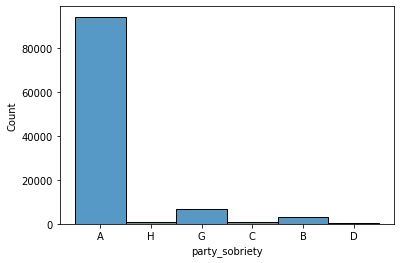

In [26]:
sns.histplot(training_with_party['party_sobriety'])

In [27]:
grouped_party_collision = training_with_party.groupby(['party_sobriety', 'time_col'])['injured_victims'].sum().reset_index()
grouped_party_collision

,party_sobriety,time_col,injured_victims
0,A,00,614.0
1,A,01,426.0
2,A,02,287.0
3,A,03,299.0
4,A,04,334.0
...,...,...,...
139,H,19,24.0
140,H,20,12.0
141,H,21,14.0
142,H,22,27.0


In [28]:
training_with_victim = training.merge(cleaned_victim, on = 'case_id', how = 'left')
training_with_victim

,case_id,jurisdiction,officer_id,reporting_district,chp_shift,population,county_city_location,special_condition,beat_type,chp_beat_type,...,latitude,longitude,collision_date,collision_time,process_date,time_col,victim_sex,victim_age,victim_seating_position,victim_safety_equipment_1
0,8.975622e+06,3003.0,1248,NaN,5,5.0,3003,0.0,0,not chp,...,NaN,NaN,2019-09-28,18:58:00,2019-11-22,18,NaN,NaN,NaN,NaN
1,2.413594e+06,3000.0,1978,NaN,5,4.0,3021,0.0,0,not chp,...,NaN,NaN,2005-12-10,15:00:00,2006-04-13,15,male,33.0,1.0,W
2,4.419931e+06,4307.0,S0542,LG206,5,4.0,4307,0.0,0,not chp,...,NaN,NaN,2009-09-11,14:57:00,2010-05-19,14,male,42.0,1,P
3,3.801010e+18,3801.0,2108,0,5,7.0,3801,NaN,0,not chp,...,NaN,NaN,2001-03-19,17:05:00,2001-07-27,17,male,37.0,9.0,B
4,8.142389e+06,2701.0,5543,CRML,5,2.0,2701,0.0,0,not chp,...,NaN,NaN,2016-09-17,17:32:00,2016-10-20,17,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279992,8.379958e+06,1901.0,275,17,5,5.0,1901,0.0,0,not chp,...,NaN,NaN,2017-04-20,11:52:00,2017-07-06,11,NaN,NaN,NaN,NaN
279993,3.388177e+06,9295.0,010846,NaN,1,9.0,300,0.0,1,state route,...,NaN,NaN,2007-09-20,12:15:00,2008-03-27,12,male,44.0,1.0,P
279994,8.749483e+06,3342.0,788,631,5,4.0,3342,0.0,0,not chp,...,NaN,NaN,2018-09-04,05:33:00,2019-01-08,05,male,23.0,1.0,P
279995,9.019111e+07,9135.0,014425,NaN,2,9.0,4500,0.0,2,safety services program,...,NaN,NaN,2016-05-24,15:30:00,2016-05-31,15,male,52.0,1.0,P


<AxesSubplot:xlabel='victim_sex', ylabel='injured_victims'>

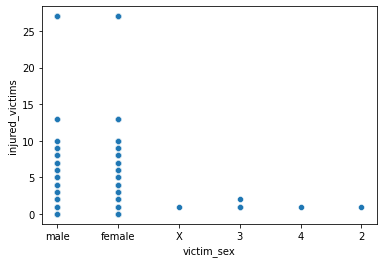

In [29]:
sns.scatterplot(data=training_with_victim, x='victim_sex', y='injured_victims')

<AxesSubplot:xlabel='victim_age', ylabel='injured_victims'>

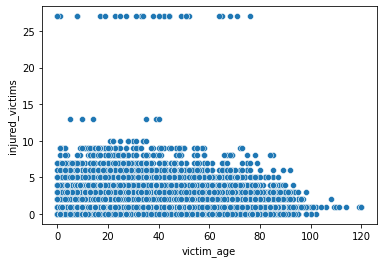

In [30]:
sns.scatterplot(data=training_with_victim, x='victim_age', y='injured_victims')

<AxesSubplot:xlabel='victim_safety_equipment_1', ylabel='injured_victims'>

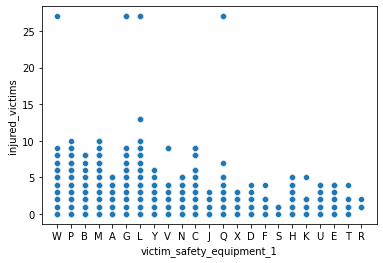

In [31]:
sns.scatterplot(data=training_with_victim, x='victim_safety_equipment_1', y='injured_victims')

### Predicting

In [32]:
#x = contains Design Matrix
#y = injured victims 

In [33]:
from sklearn import linear_model as lm

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [36]:
def train_test_split(data):
    data_len = data.shape[0]
    shuffled_indices = np.random.permutation(data_len)
    train_indices = shuffled_indices[0:int(len(shuffled_indices)*0.8)]
    test_indices = shuffled_indices[int(len(shuffled_indices)*0.8):]
    return data.iloc[train_indices], data.iloc[test_indices]

training, validation = train_test_split(cleaned_training)

training.columns

Index(['case_id', 'injured_victims', 'weather_1', 'county_city_location',
       'location_type', 'pcf_violation_category', 'collision_severity',
       'lighting', 'time_col'],
      dtype='object')

In [37]:
def process_data(data, pipeline_functions, prediction_col):
    """Process the data for a guided model."""
    for function, arguments, keyword_arguments in pipeline_functions:
        if keyword_arguments and (not arguments):
            data = data.pipe(function, **keyword_arguments)
        elif (not keyword_arguments) and (arguments):
            data = data.pipe(function, *arguments)
        else:
            data = data.pipe(function)
    X = data.drop(columns=[prediction_col]).to_numpy()
    y = data.loc[:, prediction_col].round().to_numpy()
    return X, np.round(abs(y))

def select_columns(data, *columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]

def split_ohe(data, col):
    choices = data[col].unique()
    for choice in choices:
        if not choice:
            continue
        choice = str(choice)
        data['x0_' + str(choice)] = int(1) * list(data[col] == choice)
    return data

train_pipeline = [
    (split_ohe, None, {
        'col': 'lighting',
    }),
    (split_ohe, None, {
        'col': 'pcf_violation_category',
    }),
    (split_ohe, None, {
        'col': 'collision_severity',
    }),
    (select_columns, ['injured_victims', 'time_col'],
        None)
]

test_pipeline = train_pipeline[1:]

X_train, y_train = process_data(cleaned_training, train_pipeline, 'injured_victims')
X_validation, y_validation = process_data(validation, test_pipeline, 'injured_victims')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [38]:
def rmse(predicted, actual):
    return np.sqrt(np.mean((actual - predicted)**2))

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

linearmodel = lm.LinearRegression(fit_intercept=True).fit(X_train, y_train)

In [40]:
y_fitted_m1 = linearmodel.fit(X_train, y_train).predict(X_train) 
y_predicted_m1 = linearmodel.predict(X_validation) 


In [41]:
training_error_m1 = rmse(y_fitted_m1, y_train)
test_error_m1 = rmse(y_predicted_m1, y_validation)
print("Our Model\nTraining RMSE: {}\nTest RMSE: {}\n".format(training_error_m1, test_error_m1))
test_error_m1 - training_error_m1

Our Model
Training RMSE: 0.6031609660579719
Test RMSE: 0.608333123078364



0.0051721570203920875

In [42]:
cleaned_training.head(2)

,case_id,injured_victims,weather_1,county_city_location,location_type,pcf_violation_category,collision_severity,lighting,time_col,x0_dark with no street lights,...,x0_fell asleep,x0_impeding traffic,x0_lights,x0_brakes,x0_pedestrian dui,x0_property damage only,x0_other injury,x0_pain,x0_severe injury,x0_fatal
5,3098229.0,0.0,clear,1941,highway,other than driver (or pedestrian),property damage only,dark with no street lights,02,True,...,False,False,False,False,False,True,False,False,False,False
8,260712.0,1.0,cloudy,3007,highway,unsafe lane change,other injury,daylight,09,False,...,False,False,False,False,False,False,True,False,False,False


In [43]:
validation.head(5)

,case_id,injured_victims,weather_1,county_city_location,location_type,pcf_violation_category,collision_severity,lighting,time_col,x0_other than driver (or pedestrian),...,x0_other equipment,x0_impeding traffic,x0_pedestrian right of way,x0_brakes,x0_hazardous parking,x0_severe injury,x0_property damage only,x0_other injury,x0_pain,x0_fatal
163865,4488085.0,1.0,clear,3001,highway,other than driver (or pedestrian),severe injury,daylight,08,True,...,False,False,False,False,False,True,False,False,False,False
183756,3403589.0,0.0,clear,2400,intersection,automobile right of way,property damage only,daylight,18,False,...,False,False,False,False,False,False,True,False,False,False
52569,1787629.0,1.0,cloudy,1900,highway,speeding,severe injury,dark with street lights,04,False,...,False,False,False,False,False,True,False,False,False,False
162483,7036159.0,1.0,clear,5608,ramp,improper turning,other injury,dark with street lights,23,False,...,False,False,False,False,False,False,False,True,False,False
99492,1117814.0,0.0,clear,104,highway,speeding,property damage only,daylight,16,False,...,False,False,False,False,False,False,True,False,False,False


In [44]:
pred = cleaned_training.merge(victim, on='case_id', how='left')
pred['pred'] = y_predicted_m1.fill(1)
pred

,case_id,injured_victims,weather_1,county_city_location,location_type,pcf_violation_category,collision_severity,lighting,time_col,x0_dark with no street lights,...,party_number,victim_role,victim_sex,victim_age,victim_degree_of_injury,victim_seating_position,victim_safety_equipment_1,victim_safety_equipment_2,victim_ejected,pred
0,3.098229e+06,0.0,clear,1941,highway,other than driver (or pedestrian),property damage only,dark with no street lights,02,True,...,1.0,2.0,female,21.0,no injury,6.0,P,G,0.0,None
1,3.098229e+06,0.0,clear,1941,highway,other than driver (or pedestrian),property damage only,dark with no street lights,02,True,...,1.0,2.0,female,24.0,no injury,3.0,M,G,0.0,None
2,2.607120e+05,1.0,cloudy,3007,highway,unsafe lane change,other injury,daylight,09,False,...,2.0,1.0,male,32.0,other visible injury,1,W,NaN,1.0,None
3,9.335011e+18,0.0,clear,3801,highway,speeding,property damage only,daylight,17,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,8.612484e+06,1.0,clear,3015,ramp,improper turning,pain,daylight,09,False,...,1.0,2.0,female,90.0,no injury,3.0,M,G,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86257,5.906362e+06,1.0,clear,3603,ramp,speeding,severe injury,dark with street lights,18,False,...,1.0,1.0,male,68.0,severe injury,1,P,W,3.0,None
86258,5.565961e+06,0.0,clear,111,highway,speeding,property damage only,daylight,09,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
86259,8.001887e+06,1.0,clear,4316,highway,speeding,other injury,daylight,14,False,...,1.0,1.0,male,44.0,other visible injury,1.0,P,W,3.0,None
86260,3.388177e+06,1.0,cloudy,300,highway,wrong side of road,pain,daylight,12,False,...,1.0,1.0,male,44.0,complaint of pain,1.0,P,W,1.0,None


In [45]:
submission = pred[['case_id', 'injured_victims']]
submission = submission.iloc[1: , :]
submission

,case_id,injured_victims
1,3.098229e+06,0.0
2,2.607120e+05,1.0
3,9.335011e+18,0.0
4,8.612484e+06,1.0
5,8.612484e+06,1.0
...,...,...
86257,5.906362e+06,1.0
86258,5.565961e+06,0.0
86259,8.001887e+06,1.0
86260,3.388177e+06,1.0


In [46]:
submission.to_csv('submission.csv', index=False)